#### Sudha Amarnath (013709956)<br>Graduate and Extended Studies<br>FA19: CMPE-297 Sec 01 - Special Topics<br>Prof. Chandrasekar Vuppalapati


# Assignment #8: Market Basket Item - Apriori Algorithm Dataset from real-world retailer
#### Apply Apriori algorithm to generate association rules and predict next basket item.<br>Dataset: Excel Dataset contains Order ID, User ID, Product Item name.<br>Consider Order ID as Transaction ID and group items by order id. <br>Generate Association rules MIN_SUP: 0.0045 MIN_CONF:0.2

### Import required libraries, load the TRAIN-ARULES.csv file and create a new DataFrame out of it.

In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import numpy as np
import matplotlib.pyplot as plt
from apyori import apriori
import os
df = pd.read_csv(r'C:\Users\sudha\Desktop\CMPE297\Assignments\TRAIN-ARULES.csv')
#prints the size of the dataframe
print(df.shape)
#prints the contents of the dataframe
df.head()

(12963, 3)


,order_id,user_id,product_name
0,1483,90,Organic Pink Lemonade Bunny Fruit Snacks
1,1483,90,Dark Chocolate Minis
2,1483,90,"Sparkling Water, Natural Mango Essenced"
3,1483,90,Peach-Pear Sparkling Water
4,1483,90,Organic Heritage Flakes Cereal


### Load the testarules.csv file and create a new DataFrame out of it. 

In [2]:
rf = pd.read_csv(r'C:\Users\sudha\Desktop\CMPE297\Assignments\testarules.csv')
rf.dropna(axis='columns', inplace=True)
print(rf.shape)
rf.head()

(1, 3)


,Item1,Item2,Item3
0,Dark Chocolate Minis,Organic Pink Lemonade Bunny Fruit Snacks,Peach-Pear Sparkling Water


### Combine all the items of the same transaction to  its unique order_id and display the dataframe. The shape shows 1418 rows and 2 columns.

In [3]:
tups = [('product_name', ','.join)]
df1 = df['product_name'].astype(str).groupby(df['order_id']).agg(tups).reset_index()

print(df1.shape)

total_rows = len(df1.index)

df1.head()


(1418, 2)


,order_id,product_name
0,1483,"Organic Pink Lemonade Bunny Fruit Snacks,Dark ..."
1,4595,"Creme De Menthe Thins,Milk Chocolate English T..."
2,7099,"Revive Zero Vitamin Water,VitaminWater Zero™ X..."
3,8382,"Mountain Spring Water,Clementines, Bag,Pineapp..."
4,14400,"Truffle, Sea Salt,Black Truffle,1500 Pale Ale"


### Create a list and append all the itemsets of the TRAIN-ARULES DataFrame.

In [4]:
records = []
for i in range(0,total_rows):
    pn = df1['product_name'][i]
    lst = list(pn.split(','))
    lst2 = []
    for l in lst:
        lst2.append(l.strip())
    #lst2.sort()
    records.append(lst2)
#display the list of items in record[0] 
print(len(records))
print(records[0])


1418
['Organic Pink Lemonade Bunny Fruit Snacks', 'Dark Chocolate Minis', 'Sparkling Water', 'Natural Mango Essenced', 'Peach-Pear Sparkling Water', 'Organic Heritage Flakes Cereal', 'Popped Salted Caramel Granola Bars', 'Healthy Grains Granola Bar', 'Vanilla Blueberry', 'Flax Plus Organic Pumpkin Flax Granola', 'Sweet & Salty Nut Almond Granola Bars', 'Cool Mint Chocolate Energy Bar', 'Chocolate Chip Energy Bars', 'Trail Mix Fruit & Nut Chewy Granola Bars']


### Generate association rules from Apriori algorithm to the above itemsets list, to detect the next basket of frequently bought items. Given min_sup=0.0045 and min_conf=0.2

In [5]:
association_rules = apriori(records, min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=2)
association_results = list(association_rules)

### Creating associtaion rules for train dataframe and finding associtions for test itemsets from it.

In [6]:
import re

af = pd.DataFrame(columns=['Frozenset', 'Rule', 'Support', 'Confidence', 'Lift'])
tf = pd.DataFrame(columns=['Frozenset', 'Rule', 'Support', 'Confidence', 'Lift'])

testitem1 = rf['Item1'][0]
testitem2 = rf['Item2'][0]
testitem3 = rf['Item3'][0]

index = 0
tfindex = 0
for item in association_results:
    
    #first index of the inner list
    # Contains base item and add item
    pair = item[0]
    fznset = item[0]
    items = [x for x in pair]
    rule = items[0] + " -> " + items[1]
    support = float(item[1])
    confidence = float(item[2][0][2])
    lift = float(item[2][0][3])
    
    #creating dataframe for the association rules with min_sup and min_conf
    af.at[index, 'Frozenset'] = fznset        
    af.at[index, 'Rule'] = rule    
    af.at[index, 'Support'] = support
    af.at[index, 'Confidence'] = confidence
    af.at[index, 'Lift'] = lift
    
    #creating dataframe for test dataset having occurance of test itemset
    if (re.search(testitem1, str(fznset)) and re.search(testitem2, str(fznset)) and re.search(testitem3, str(fznset))):
        if ((items[0] == testitem1 or items[0] == testitem2 or items[0] == testitem3) and \
            (items[1] == testitem1 or items[1] == testitem2 or items[1] == testitem3)):

            tf.at[tfindex, 'Frozenset'] = fznset
            tf.at[tfindex, 'Rule'] = rule    
            tf.at[tfindex, 'Support'] = support
            tf.at[tfindex, 'Confidence'] = confidence
            tf.at[tfindex, 'Lift'] = lift
            tfindex = tfindex + 1
            
    index = index + 1

### Total number of Associations 

In [7]:
print('Total number of Associations: ', len(association_results))
print(af.shape)
total_rows = len(af.index)
total_cols = len(af.columns)

Total number of Associations:  1250
(1250, 5)


### Print all Assocation Rules with min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=2

In [8]:
pd.set_option('display.max_columns', total_cols)
pd.set_option('display.max_colwidth', -1)
af.head(len(association_results))


,Frozenset,Rule,Support,Confidence,Lift
0,"(& orange, Crunch Chocolate Peanut Butter Granola Bar)",& orange -> Crunch Chocolate Peanut Butter Granola Bar,0.00564175,0.571429,36.8312
1,"(& orange, Dark Chocolate Minis)",& orange -> Dark Chocolate Minis,0.00493653,0.5,23.6333
2,"(& orange, Organic Bernie's Farm Fruit Snacks strawberry)",& orange -> Organic Bernie's Farm Fruit Snacks strawberry,0.00987306,1,101.286
3,"(& orange, Organic Heritage Flakes Cereal)",& orange -> Organic Heritage Flakes Cereal,0.00564175,0.571429,18.4156
4,"(& orange, Organic Pink Lemonade Bunny Fruit Snacks)",& orange -> Organic Pink Lemonade Bunny Fruit Snacks,0.00493653,0.5,24.4483
5,"(& orange, Peach-Pear Sparkling Water)",& orange -> Peach-Pear Sparkling Water,0.00564175,0.571429,33.7619
6,"(& orange, raspberry)",& orange -> raspberry,0.00987306,1,101.286
7,"(Apples, 0% Greek Strained Yogurt)",Apples -> 0% Greek Strained Yogurt,0.00634697,0.642857,39.6335
8,"(0% Greek Strained Yogurt, Bag of Organic Bananas)",0% Greek Strained Yogurt -> Bag of Organic Bananas,0.00705219,0.714286,5.38754
9,"(Soda, 0% Greek Strained Yogurt)",Soda -> 0% Greek Strained Yogurt,0.00634697,0.642857,12.3185


### Data Visualization using matlab plot for the Market Dataset showing Support and Confidence of each association rule



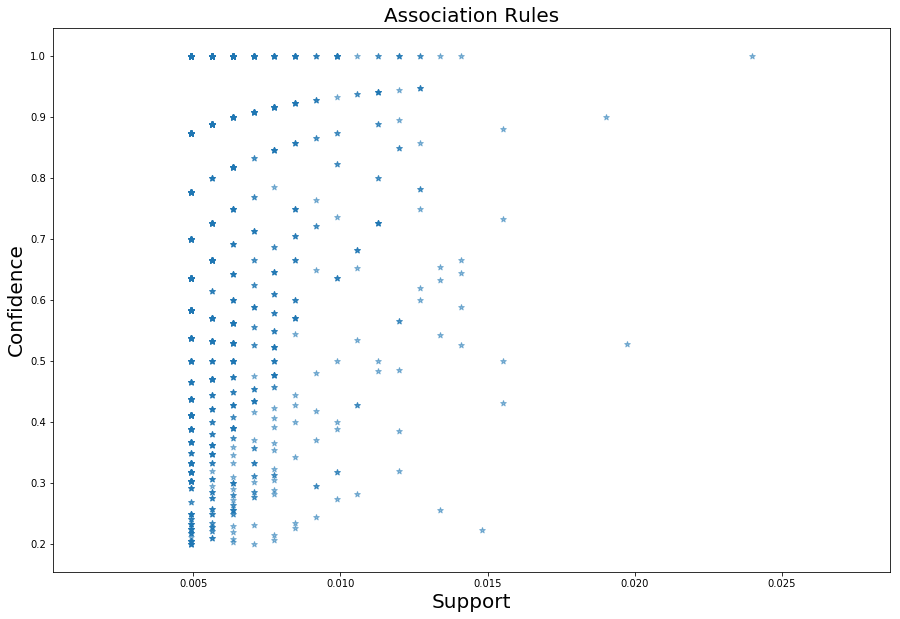

In [9]:
import matplotlib.pyplot as plt

support = list(af['Support'])
confidence = list(af['Confidence'])

plt.rcParams["figure.figsize"] = (15,10)
plt.title('Association Rules', fontsize=20)
plt.scatter(support, confidence, alpha=.5, marker="*")
plt.xlabel('Support', fontsize=20)
plt.ylabel('Confidence', fontsize=20) 
plt.show()

### Test dataframe containing associations for only items in test itemset 

In [10]:
print(tf.shape)
total_rows = len(tf.index)
total_cols = len(tf.columns)
tf.head(total_rows)


(8, 5)


,Frozenset,Rule,Support,Confidence,Lift
0,"(Peach-Pear Sparkling Water, Organic Pink Lemonade Bunny Fruit Snacks, Dark Chocolate Minis)",Peach-Pear Sparkling Water -> Organic Pink Lemonade Bunny Fruit Snacks,0.0112835,0.727273,42.9697
1,"(Peach-Pear Sparkling Water, Organic Pink Lemonade Bunny Fruit Snacks, Maple Pumpkin Seeds with Sea Salt Chewy with a Crunch Granola Bars, Dark Chocolate Minis)",Peach-Pear Sparkling Water -> Organic Pink Lemonade Bunny Fruit Snacks,0.00493653,0.875,51.6979
2,"(Peach-Pear Sparkling Water, Organic Pink Lemonade Bunny Fruit Snacks, Dark Chocolate Minis, Organic Heritage Flakes Cereal)",Peach-Pear Sparkling Water -> Organic Pink Lemonade Bunny Fruit Snacks,0.00846262,0.75,44.3125
3,"(Peach-Pear Sparkling Water, Organic Pink Lemonade Bunny Fruit Snacks, Sparkling Water, Dark Chocolate Minis)",Peach-Pear Sparkling Water -> Organic Pink Lemonade Bunny Fruit Snacks,0.0105783,0.9375,51.1298
4,"(Organic Pink Lemonade Bunny Fruit Snacks, Dark Chocolate Minis, Organic Heritage Flakes Cereal, Peach-Pear Sparkling Water, Organic Graham Crunch Cereal)",Organic Pink Lemonade Bunny Fruit Snacks -> Dark Chocolate Minis,0.00493653,0.875,51.6979
5,"(Organic Pink Lemonade Bunny Fruit Snacks, Dark Chocolate Minis, Peach-Pear Sparkling Water, Organic Graham Crunch Cereal, Sparkling Water)",Organic Pink Lemonade Bunny Fruit Snacks -> Dark Chocolate Minis,0.00493653,1,54.5385
6,"(Organic Pink Lemonade Bunny Fruit Snacks, Dark Chocolate Minis, Organic Heritage Flakes Cereal, Peach-Pear Sparkling Water, Sparkling Water)",Organic Pink Lemonade Bunny Fruit Snacks -> Dark Chocolate Minis,0.0077574,0.916667,49.9936
7,"(Organic Pink Lemonade Bunny Fruit Snacks, Dark Chocolate Minis, Organic Heritage Flakes Cereal, Peach-Pear Sparkling Water, Organic Graham Crunch Cereal, Sparkling Water)",Organic Pink Lemonade Bunny Fruit Snacks -> Dark Chocolate Minis,0.00493653,1,54.5385


### Train and Test Dataset Analysis
The support value for the first rule is 0.0045. This number is calculated by dividing the number of transactions containing ‘Dark Chocolate Minis, Organic Pink Lemonade Bunny Fruit Snacks, Peach-Pear Sparkling Water by the total number of transactions.

The confidence level for the rule is 0.2, which shows that out of all the transactions that contain “Dark Chocolate Minis”,  “Peach-Pear Sparkling Water” and ‘Organic Pink Lemonade Bunny Fruit Snacks’, for row 0 in the above test dataframe, the transaction containing "Peach-Pear Sparkling Water” also contains ‘Organic Pink Lemonade Bunny Fruit Snacks’ 72.72% of the time.

The lift of 42.9697 tells us that “Peach-Pear Sparkling Water” is 42.9697 times more likely to be bought by the customers who buy “Organic Pink Lemonade Bunny Fruit Snacks” compared to the default likelihood sale of “Peach-Pear Sparkling Water”.